# Subtask 3

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load the data
data = pd.read_csv('energydata_complete.csv')



In [3]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [4]:
# Step 2: Preprocess the Data

data = data.select_dtypes(include=[np.number])  # Only keep numeric columns
data.dropna(inplace=True)  # Remove rows with missing values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



C:\Users\rocke\AppData\Local\Temp\ipykernel_23900\3311948728.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], c=colors, cmap='viridis')


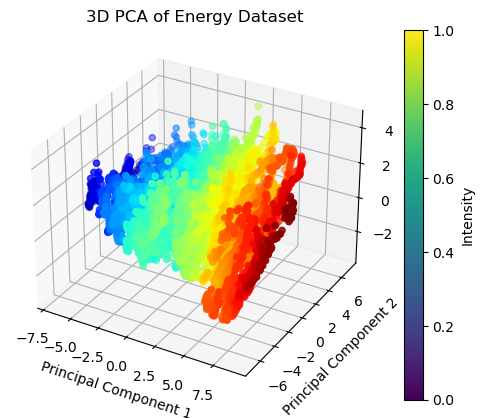

In [7]:
# Step 3: Dimensionality Reduction
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_scaled)

# Step 4: Visualize the Data with Colorful Representation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate colors based on one of the principal components (for example, the first component)
colors = plt.cm.jet((data_reduced[:, 0] - np.min(data_reduced[:, 0])) / (np.max(data_reduced[:, 0]) - np.min(data_reduced[:, 0])))

# Create a scatter plot with a color map
scatter = ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], c=colors, cmap='viridis')

# Add a color bar
color_bar = plt.colorbar(scatter)
color_bar.set_label('Intensity')

# Set titles and labels
ax.set_title('3D PCA of Energy Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [8]:
# Step 5: Evaluate the Reduction
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.35879536 0.27166393 0.07196565]
Total Explained Variance: 0.7024249325849576


In [11]:
# Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(data_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19735 samples in 0.003s...
[t-SNE] Computed neighbors for 19735 samples in 1.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19735
[t-SNE] Computed conditional probabilities for sample 2000 / 19735
[t-SNE] Computed conditional probabilities for sample 3000 / 19735
[t-SNE] Computed conditional probabilities for sample 4000 / 19735
[t-SNE] Computed conditional probabilities for sample 5000 / 19735
[t-SNE] Computed conditional probabilities for sample 6000 / 19735
[t-SNE] Computed conditional probabilities for sample 7000 / 19735
[t-SNE] Computed conditional probabilities for sample 8000 / 19735
[t-SNE] Computed conditional probabilities for sample 9000 / 19735
[t-SNE] Computed conditional probabilities for sample 10000 / 19735
[t-SNE] Computed conditional probabilities for sample 11000 / 19735
[t-SNE] Computed conditional probabilities for sample 12000 / 19735
[t-SNE] Computed conditional probabilities for sa

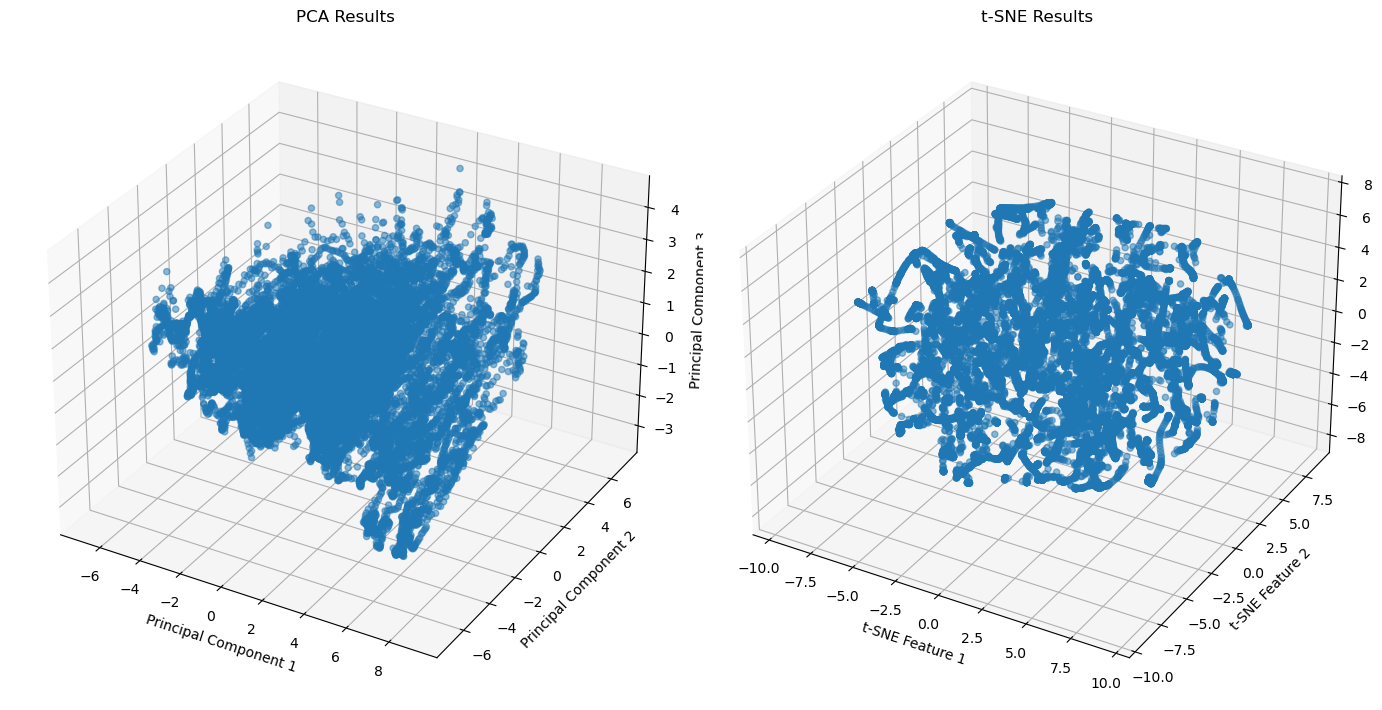

In [17]:

# Create a figure for 3D plots
fig = plt.figure(figsize=(14, 7))

# Add first subplot for PCA
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], alpha=0.5)
ax1.set_title('PCA Results')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Add second subplot for t-SNE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], alpha=0.5)
ax2.set_title('t-SNE Results')
ax2.set_xlabel('t-SNE Feature 1')
ax2.set_ylabel('t-SNE Feature 2')
ax2.set_zlabel('t-SNE Feature 3')

plt.tight_layout()
plt.show()

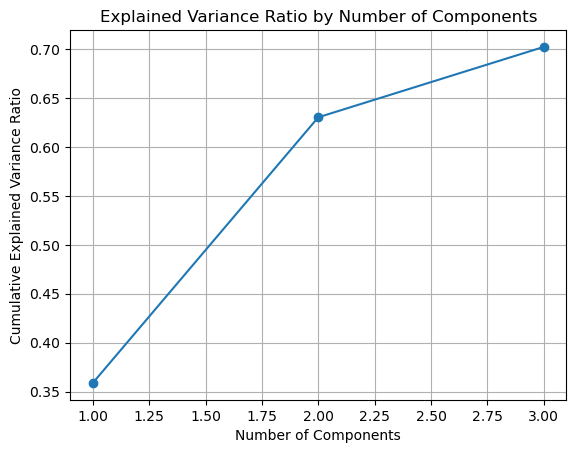

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

## Justification:

There are lots of Dimentionality reduction methods:(Anowar et al.,2021)
   #### 1.PCA:
   PCA is effective for datasets where linear correlations exist among features.it was to facilitate visualization, reduce computational costs, or improve model performance.(Maćkiewicz and Ratajczak,1993)
   ##### 2. t-Distributer Stochastic Neighbor Embedding:
   t-SNE is a non-linear dimensionality reduction technique that is particularly well suited for the visualization of high-dimensional datasets. It works by converting similarities between data points to joint probabilities and trying to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data(Belkina et al.,2019)
   #### 3.Uniform Manifold Approximation and Projection (UMAP)
UMAP is a dimensionality reduction technique that is similar in functionality to t-SNE, but operates at a much faster speed. This method is based on manifold learning techniques and the concept of topological data analysis.
Use Case: UMAP is useful for visualization and general non-linear dimensionality reduction. It is also scalable and can handle larger datasets.
   ##### 4. Linear Discriminant Analysis (LDA)
LDA is both a linear classification technique and a dimensionality reduction technique. It works by attempting to find a linear combination of features that separates two or more classes of objects or events. The resulting combination can be used as a linear classifier or for dimensionality reduction.
   ###### 5. Isomap
Isomap is a non-linear dimensionality reduction method based on the geometric distances between points. 
   6. Autoencoders
 Autoencoders are a type of artificial neural network used to learn efficient codings of unlabeled data.
   ##### 7. Multidimensional Scaling (MDS)
 MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric space.
Use Case: Suitable for visualizing the similarities among various data points in a dataset, which is useful in exploratory data analysis.
   ###### 8. Factor Analysis
Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of potentially lower unobserved variables called factors.
#### Reason for Choosing PCA:
 1. PCA is effective for datasets where linear correlations exist in feature. By plotting in 3D axes we can seen that the relation are more linear and straightforward.
 2. For simplyfying data without losing much information.PCA's ability to preserve global structures might have been a deciding factor.
 3. Explained Variance Ratio: [0.35879536 0.27166393 0.07196565]
Total Explained Variance: 0.7024249325849576 from this report we learned that it retains 70% informations in reduced data set.
 4. Real world application will be easier if we use PCA. Because it uses less computational power means less energy consumption.
 5.  PCA tends to preserve global structure and is good at capturing the direction of maximum variances in data.
#### Conclusion:
Each method has its strengths and is useful depending on the goals of your analysis. PCA can be seen as a more "macro" view of data, capturing the largest structures and serving as a powerful tool for feature reduction and noise removal. t-SNE, on the other hand, offers a more "micro" view that can reveal intricate patterns and groupings at smaller scales, useful for exploratory data analysis and understanding complex datasets where local relationships are critical. 
 
 #### References:
    Anowar, F., Sadaoui, S. and Selim, B., 2021. Conceptual and empirical comparison of dimensionality reduction algorithms (pca, kpca, lda, mds, svd, lle, isomap, le, ica, t-sne). Computer Science Review, 40, p.100378.
    Belkina, A.C., Ciccolella, C.O., Anno, R., Halpert, R., Spidlen, J. and Snyder-Cappione, J.E., 2019. Automated optimized parameters for T-distributed stochastic neighbor embedding improve visualization and analysis of large datasets. Nature communications, 10(1), p.5415.
    Maćkiewicz, A. and Ratajczak, W., 1993. Principal components analysis (PCA). Computers & Geosciences, 19(3), pp.303-342.
    